<a href="https://colab.research.google.com/github/fatimakgeneng/Finetuning-with-Python/blob/main/Finetuning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gemini API: Model tuning with Python**

In [57]:
# Setup
%pip install -Uq google-generativeai rich  #Rich is just for printing in clear format

In [58]:
# Importing Libraries
import google.generativeai as genai
from rich import print
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

## Before Finetuning

In [59]:
model = genai.GenerativeModel(model_name="models/gemini-1.5-flash-001")

query = "55"
result = model.generate_content(query)
print(f"Query 1: {query}\nResult: {result.text}")

query = "123455"
result = model.generate_content(query)
print(f"Query 2: {query}\nResult: {result.text}")

query = "four"
result = model.generate_content(query)
print(f"Query 3: {query}\nResult: {result.text}")

query = "quatre" #4
result = model.generate_content(query)
print(f"Query 4: {query}\nResult: {result.text}")

query = "III"
result = model.generate_content(query)
print(f"Query 5: {query}\nResult: {result.text}")

query = "七" #7
result = model.generate_content(query)
print(f"Query 6: {query}\nResult: {result.text}")



Query 1: 55
Result: 55 is a fascinating number!  What would you like to know about it? 

For example, I could tell you:

* **It's an odd number.**
* **It's a prime number.** 
* **It's the sum of the first five odd numbers.** 
* **It's the atomic number of cesium.** 

Let me know what you'd like to explore!

Query 2: 123455
Result: That's a number! Is there anything you'd like me to do with it? For example:

* **What is the sum of the digits?** 
* **Is it a prime number?** 
* **What is the next number in the sequence?**

Let me know, and I'll help!

Query 3: four
Result: Four is a fascinating number! It's the smallest composite number (meaning it has more than two factors), a 
perfect square, and the number of sides on a square.  

What would you like to know about four?  For example, do you want to: 

* **Learn more about its mathematical properties?**
* **See some examples of things that come in fours?**
* **Discover some fun facts about the number four?** 

Let me know and I'll do my best to help!

Query 4: quatre
Result: "Quatre" is the French word for **four**.  

Is there anything else you'd like to know about the number four or the word "quatre"?

Query 5: III
Result: Please provide me with more context! "III" by itself is not a complete question or statement. 

To help me understand what you're asking, please tell me:

* **What is the subject matter?** Is this related to a book, movie, song, or something else?
* **What is the context of "III"?**  Is it a chapter number, a part of a title, or something else?

Once I have more information, I can provide a helpful response!

Query 6: 七
Result: 七是一个数字，是介于六和八之间的自然数。 

你想知道关于七的什么？  例如：

* 七的性质（质数，奇数等）
* 与七相关的文化意义
* 七在数学中的应用
* 与七相关的谚语或俗语

请告诉我你感兴趣的方面，我会尽力提供更多信息。

# Preparing Data for Finetuning

In [60]:
import random
import time

In [61]:
# Printing the list of available models
print("Available base models:", [m.name for m in genai.list_models()])

Available base models:
[
    'models/chat-bison-001',
    'models/text-bison-001',
    'models/embedding-gecko-001',
    'models/gemini-1.0-pro-latest',
    'models/gemini-1.0-pro',
    'models/gemini-pro',
    'models/gemini-1.0-pro-001',
    'models/gemini-1.0-pro-vision-latest',
    'models/gemini-pro-vision',
    'models/gemini-1.5-pro-latest',
    'models/gemini-1.5-pro-001',
    'models/gemini-1.5-pro-002',
    'models/gemini-1.5-pro',
    'models/gemini-1.5-pro-exp-0801',
    'models/gemini-1.5-pro-exp-0827',
    'models/gemini-1.5-flash-latest',
    'models/gemini-1.5-flash-001',
    'models/gemini-1.5-flash-001-tuning',
    'models/gemini-1.5-flash',
    'models/gemini-1.5-flash-exp-0827',
    'models/gemini-1.5-flash-002',
    'models/gemini-1.5-flash-8b',
    'models/gemini-1.5-flash-8b-001',
    'models/gemini-1.5-flash-8b-latest',
    'models/gemini-1.5-flash-8b-exp-0827',
    'models/gemini-1.5-flash-8b-exp-0924',
    'models/gemini-2.0-flash-exp',
    'models/gemini-exp-1206',
    'models/gemini-exp-1121',
    'models/gemini-exp-1114',
    'models/gemini-2.0-flash-thinking-exp-01-21',
    'models/gemini-2.0-flash-thinking-exp',
    'models/gemini-2.0-flash-thinking-exp-1219',
    'models/learnlm-1.5-pro-experimental',
    'models/embedding-001',
    'models/text-embedding-004',
    'models/aqa'
]

In [62]:
# Choosing a base model which will be tuned
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods][1]
print(base_model)

Model(
    name='models/gemini-1.5-flash-001-tuning',
    base_model_id='',
    version='001',
    display_name='Gemini 1.5 Flash 001 Tuning',
    description='Version of Gemini 1.5 Flash that supports tuning, our fast and versatile multimodal model for 
scaling across diverse tasks, released in May of 2024.',
    input_token_limit=16384,
    output_token_limit=8192,
    supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
    temperature=1.0,
    max_temperature=2.0,
    top_p=0.95,
    top_k=64
)

In [63]:
# Setting name for our model
name = f'fatimakgeneng{random.randint(0,10)}'

In [64]:
# Tuning Data
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=[
        {'text_input': '1', 'output': '2'},
        {'text_input': '3', 'output': '4'},
        {'text_input': '-3', 'output': '-2'},
        {'text_input': 'twenty two', 'output': 'twenty three'},
        {'text_input': 'two hundred', 'output': 'two hundred one'},
        {'text_input': 'ninety nine', 'output': 'one hundred'},
        {'text_input': '8', 'output': '9'},
        {'text_input': '-98', 'output': '-97'},
        {'text_input': '1,000', 'output': '1,001'},
        {'text_input': '10,100,000', 'output': '10,100,001'},
        {'text_input': 'thirteen', 'output': 'fourteen'},
        {'text_input': 'eighty', 'output': 'eighty one'},
        {'text_input': 'one', 'output': 'two'},
        {'text_input': 'three', 'output': 'four'},
        {'text_input': 'seven', 'output': 'eight'},
    ],
    id=name,
    epoch_count=5,
    batch_size=4,
    learning_rate=0.001,
)

In [65]:
# Checking model status
model = genai.get_tuned_model(f'tunedModels/{name}')
print(model.state)


1

In [66]:
# Waiting for the training to finish
for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/19 [00:00<?, ?it/s]

# Evaluating the created model

Check the existing tuned models with `genai.list_tuned_model` method.

In [67]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/fatimakgeneng2

tunedModels/fatimakgeneng8

In [72]:
# Evalute
model = genai.GenerativeModel(model_name="tunedModels/fatimakgeneng8")

In [73]:
query = '55'
result = model.generate_content(query)
print(f"Query 1: {query}, Result: {result.text}")

query = '123455'
result = model.generate_content(query)
print(f"Query 2: {query}, Result: {result.text}")

query = 'four'
result = model.generate_content(query)
print(f"Query 3: {query}, Result: {result.text}")

query = 'quatre' #4
result = model.generate_content(query)
print(f"Query 4: {query}, Result: {result.text}")

query = 'III'
result = model.generate_content(query)
print(f"Query 5: {query}, Result: {result.text}")

query = '七' #7
result = model.generate_content(query)
print(f"Query 6: {query}, Result: {result.text}")

Query 1: 55, Result: 56

Query 2: 123455, Result: 123456

Query 3: four, Result: five

Query 4: quatre, Result: cinq

Query 5: III, Result: IV

Query 6: 七, Result: 八

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

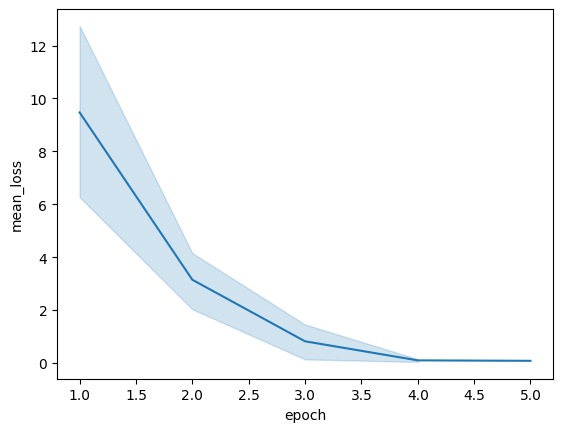

In [74]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


# **Miscellaneous**

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [ ]:
genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists:

In [ ]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/generate-num-8122?%24alt=json%3Benum-encoding%3Dint: Tuned model tunedModels/generate-num-8122 does not exist.
